# PREDICTIONS

## Loading Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix

df = pd.read_csv('../Datasets/final_tennis_dataset_symmetric.csv')

## DECISION TREE

In [3]:
# 2. Sélection des features et de la target
#    Ici, on prend toutes les colonnes sauf 'target' et, si besoin, on exclut des colonnes inutiles.
#    À adapter selon les champs exacts dans ton CSV.

# 2. Préparation des données d'entraînement
cols_to_exclude = [
    'TARGET', 'PLAYER1_ID', 'PLAYER2_ID', 'SCORE', 'TOURNEY_DATE', 'MINUTES',
    'PLAYER1_ACE', 'PLAYER2_ACE', 'PLAYER1_DF', 'PLAYER2_DF',
    'PLAYER1_SVPT', 'PLAYER2_SVPT', 'PLAYER1_1STIN', 'PLAYER2_1STIN',
    'PLAYER1_1STWON', 'PLAYER2_1STWON', 'PLAYER1_2NDWON', 'PLAYER2_2NDWON',
    'PLAYER1_SVGMS', 'PLAYER2_SVGMS', 'PLAYER1_BPSAVED', 'PLAYER2_BPSAVED',
    'PLAYER1_BPFACED', 'PLAYER2_BPFACED',
    'BP_EFFICIENCY_PLAYER1', 'BP_EFFICIENCY_PLAYER2'  # derived from post-match stats
]

X = df.drop(columns=cols_to_exclude + ['TARGET'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # Ne garder que les features numériques
y = df['TARGET']

# 3. Option : conversion en numérique si nécessaire (certaines colonnes peuvent être déjà numériques).
#    Si certaines colonnes sont catégorielles, on peut faire un pd.get_dummies ou un OrdinalEncoder.

# Exemple (facultatif):
# X = pd.get_dummies(X, drop_first=True)

# 4. Séparation train/test
#    À noter : pour une prédiction réellement future, il est préférable d’effectuer un split temporel.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Création et entraînement du Decision Tree
#    Ajuste les hyperparamètres (max_depth, min_samples_split, etc.) selon tes besoins.
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=50,
    random_state=42
)
clf.fit(X_train, y_train)

# 6. Prédictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)  # Utile pour certaines métriques comme log_loss

# 7. Évaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
ll = log_loss(y_test, y_pred_proba)

print("Accuracy :", acc)
print("F1 Score :", f1)
print("Log Loss :", ll)
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred))

# 8. Importance des features (utile pour comprendre les variables clés)
importances = clf.feature_importances_
feature_names = X_train.columns
sorted_idx = np.argsort(importances)[::-1]

print("\nTop 20 Feature Importances:")
for idx in sorted_idx[:20]:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


Accuracy : 0.6876283953435288
F1 Score : 0.6972456767818296
Log Loss : 0.5830441482580317

Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.66      0.68     13143
           1       0.68      0.72      0.70     13143

    accuracy                           0.69     26286
   macro avg       0.69      0.69      0.69     26286
weighted avg       0.69      0.69      0.69     26286

Confusion Matrix :
 [[8620 4523]
 [3688 9455]]

Top 20 Feature Importances:
ELO_DIFF: 0.6458
SERVE_DOMINANCE: 0.2802
RANK_RATIO: 0.0199
ELO_SURFACE_DIFF: 0.0161
PLAYER1_SURFACE_MATCHES: 0.0062
ATP_RANK_DIFF: 0.0059
PLAYER2_SURFACE_MATCHES: 0.0050
P_ACE_PLAYER1_LAST_100: 0.0026
P_ACE_PLAYER2_LAST_10: 0.0026
PLAYER2_RANK_POINTS: 0.0021
P_ACE_PLAYER1_LAST_50: 0.0021
P_ACE_PLAYER2_LAST_5: 0.0019
P_ACE_PLAYER1_LAST_2000: 0.0019
P_BPSAVED_PLAYER2_LAST_50: 0.0010
P_ACE_PLAYER2_LAST_50: 0.0008
P_1STIN_PLAYER1_LAST_20: 0.0008
P_1STIN_PLAYER2_LAST_100: 0.0007
P

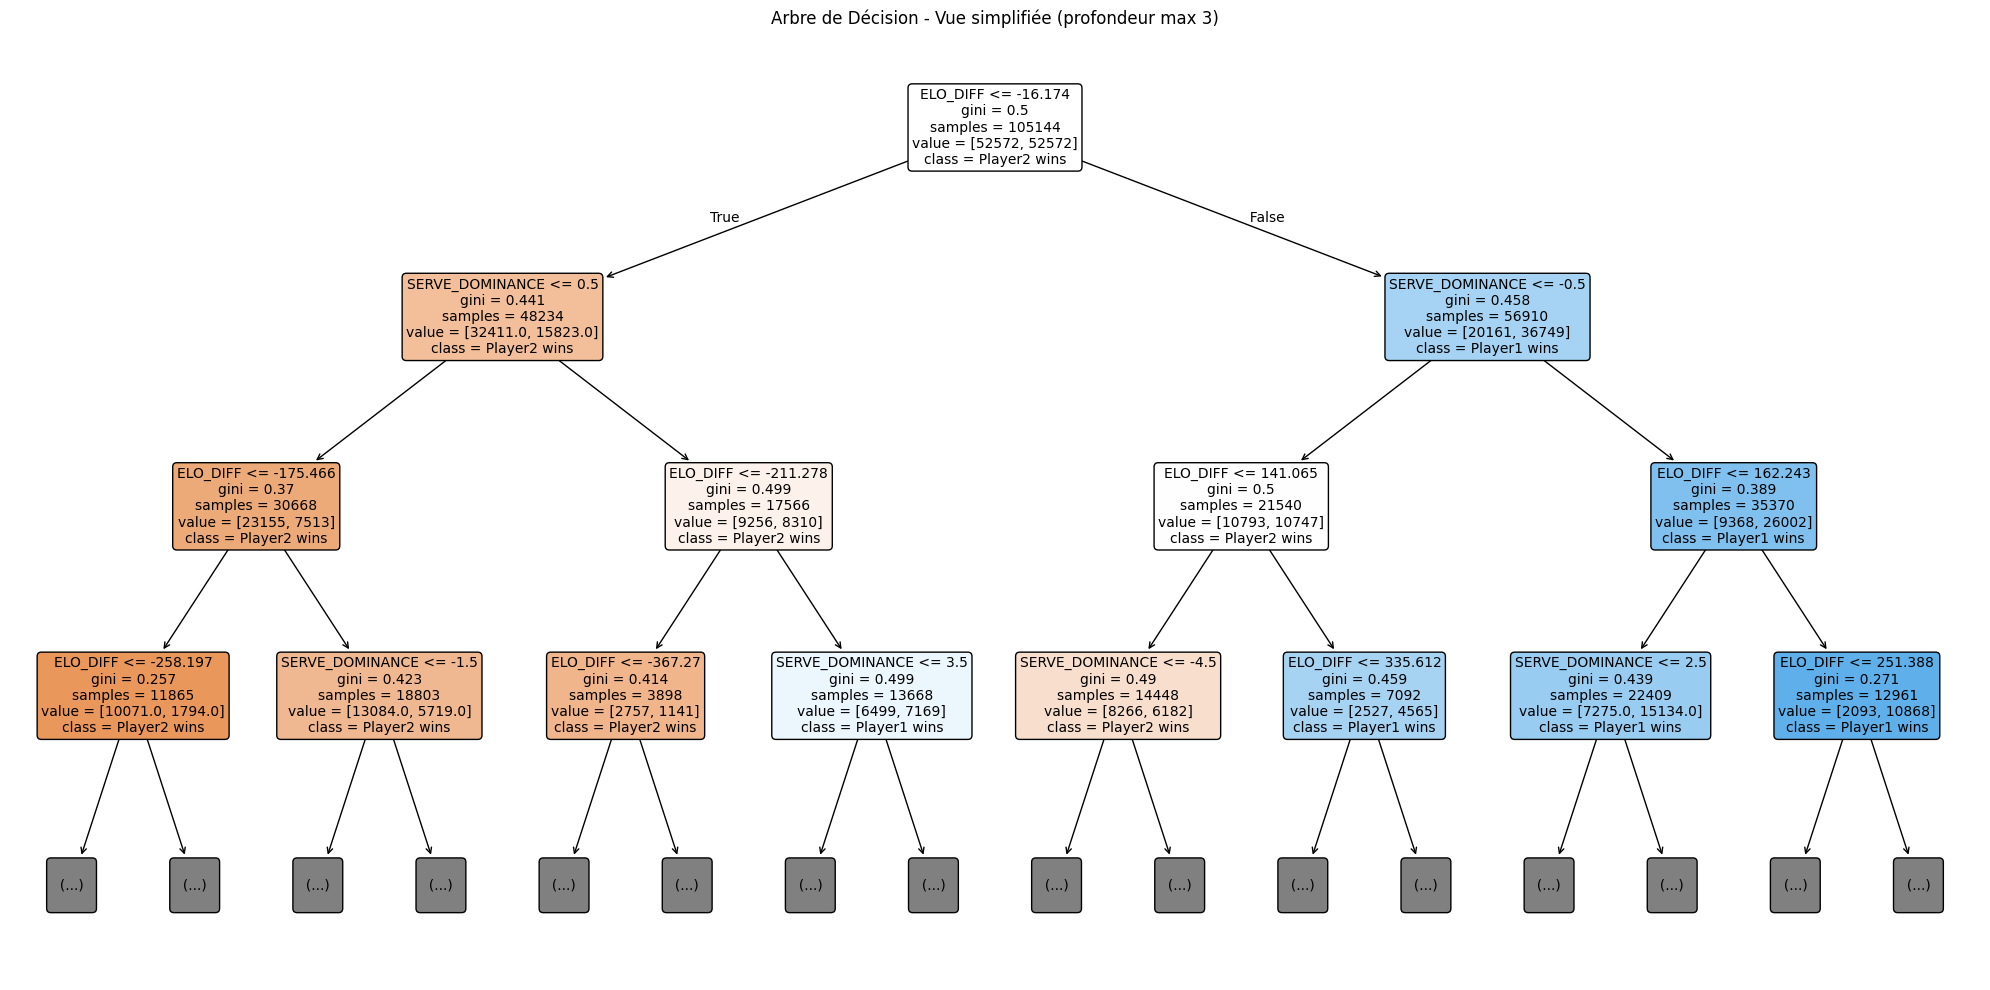

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Taille du plot adaptée à la profondeur
plt.figure(figsize=(20, 10))

# Affichage de l’arbre
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Player2 wins", "Player1 wins"],
    filled=True,
    rounded=True,
    max_depth=3,  # Tu peux changer cette valeur pour afficher plus ou moins de profondeur
    fontsize=10
)

plt.title("Arbre de Décision - Vue simplifiée (profondeur max 3)")
plt.tight_layout()
plt.show()

## RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement du dataset
df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")

# 2. Préparation des données
cols_to_exclude = [
    'TARGET', 'PLAYER1_ID', 'PLAYER2_ID', 'SCORE', 'TOURNEY_DATE', 'MINUTES',
    'PLAYER1_ACE', 'PLAYER2_ACE', 'PLAYER1_DF', 'PLAYER2_DF',
    'PLAYER1_SVPT', 'PLAYER2_SVPT', 'PLAYER1_1STIN', 'PLAYER2_1STIN',
    'PLAYER1_1STWON', 'PLAYER2_1STWON', 'PLAYER1_2NDWON', 'PLAYER2_2NDWON',
    'PLAYER1_SVGMS', 'PLAYER2_SVGMS', 'PLAYER1_BPSAVED', 'PLAYER2_BPSAVED',
    'PLAYER1_BPFACED', 'PLAYER2_BPFACED',
    'BP_EFFICIENCY_PLAYER1', 'BP_EFFICIENCY_PLAYER2'  # derived from post-match stats
]


X = df.drop(columns=cols_to_exclude + ['TARGET'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # Ne garder que les features numériques
y = df['TARGET']

# 3. Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Création et entraînement de la Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    min_samples_split=30,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # utile si léger déséquilibre
)

print("Entraînement de la Random Forest...")
rf.fit(X_train, y_train)

# 5. Prédictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# 6. Évaluation
print("\nRésultats sur le jeu de test :")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Log Loss :", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Affichage graphique de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player2 wins", "Player1 wins"],
            yticklabels=["Player2 wins", "Player1 wins"])
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 8. Affichage des 20 features les plus importantes
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances - Random Forest")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()

Entraînement de la Random Forest...


## Random forest with CV

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 12, 16],
    'min_samples_split': [10, 30, 50],
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score f1 :", grid_search.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END max_depth=8, min_samples_split=10, n_estimators=100; total time= 2.2min
[CV] END max_depth=8, min_samples_split=10, n_estimators=100; total time= 2.2min
[CV] END max_depth=8, min_samples_split=10, n_estimators=100; total time= 2.3min
[CV] END max_depth=8, min_samples_split=30, n_estimators=100; total time= 2.4min
[CV] END max_depth=8, min_samples_split=30, n_estimators=100; total time= 2.5min
[CV] END max_depth=8, min_samples_split=10, n_estimators=200; total time= 4.4min
[CV] END max_depth=8, min_samples_split=30, n_estimators=100; total time= 2.3min
[CV] END max_depth=8, min_samples_split=10, n_estimators=200; total time= 4.6min
[CV] END max_depth=8, min_samples_split=10, n_estimators=200; total time= 4.7min
[CV] END max_depth=8, min_samples_split=50, n_estimators=100; total time= 2.4min
[CV] END max_depth=8, min_samples_split=50, n_estimators=100; total time= 2.4min
[CV] END max_depth=8, min_samples_split=50, n_es

## XGBoost

Entraînement du modèle XGBoost...


/home/cytech/miniconda3/envs/TFM_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:26:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Résultats sur le jeu de test :
Accuracy : 0.939625656242867
F1 Score : 0.9395819850001903
Log Loss : 0.14470861996468892

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     13143
           1       0.94      0.94      0.94     13143

    accuracy                           0.94     26286
   macro avg       0.94      0.94      0.94     26286
weighted avg       0.94      0.94      0.94     26286

Confusion Matrix:
 [[12359   784]
 [  803 12340]]


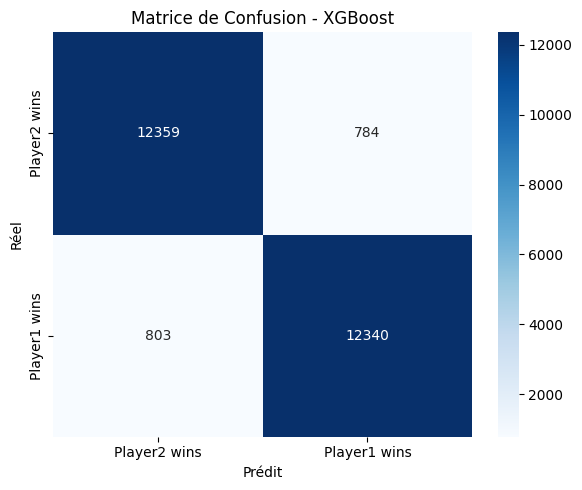

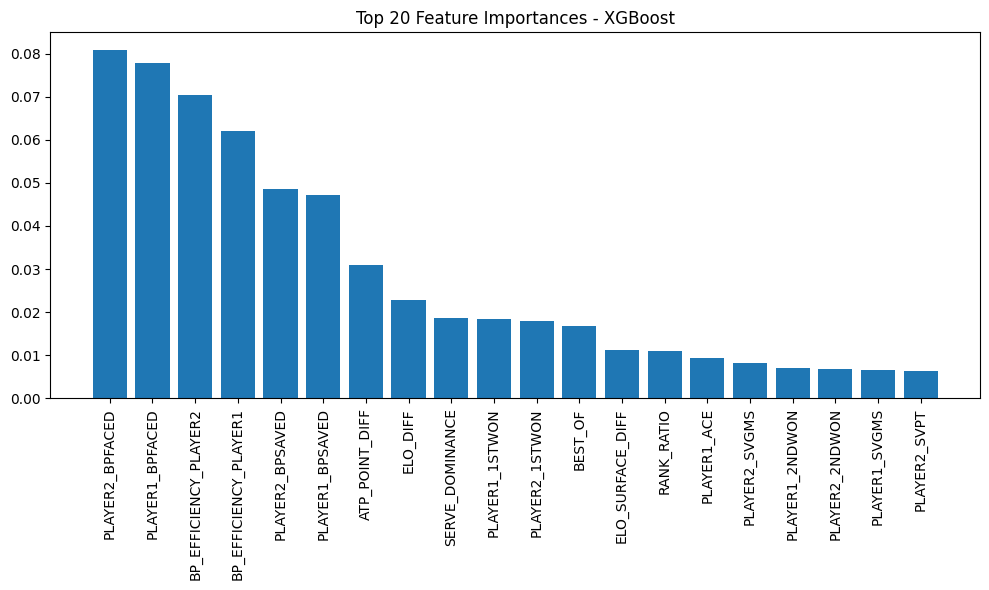

In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement du dataset
df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")

# 2. Préparation des données
cols_to_exclude = ['TARGET', 'PLAYER1_ID', 'PLAYER2_ID', 'SCORE', 'TOURNEY_DATE']
cols_to_exclude = [c for c in cols_to_exclude if c in df.columns]

X = df.drop(columns=cols_to_exclude + ['TARGET'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # Ne garder que les features numériques
y = df['TARGET']

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Entraînement XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("Entraînement du modèle XGBoost...")
xgb_model.fit(X_train, y_train)

# 5. Prédictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

# 6. Évaluation
print("\nRésultats sur le jeu de test :")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Log Loss :", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player2 wins", "Player1 wins"],
            yticklabels=["Player2 wins", "Player1 wins"])
plt.title("Matrice de Confusion - XGBoost")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# 8. Importance des variables
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances - XGBoost")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Chargement des données
df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")

# Sélection des colonnes
cols_to_exclude = ['TARGET', 'PLAYER1_ID', 'PLAYER2_ID', 'SCORE', 'TOURNEY_DATE']
cols_to_exclude = [c for c in cols_to_exclude if c in df.columns]

X = df.drop(columns=cols_to_exclude + ['TARGET'], errors='ignore')
X = X.select_dtypes(include=[np.number])  # Ne garder que les features numériques
y = df['TARGET']

# Création du modèle
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Cross-validation sur 5 folds, métrique F1
print("Validation croisée en cours (5 folds)...")
scores = cross_val_score(
    xgb_model,
    X,
    y,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1
)

# Résultats
print("\nRésultats validation croisée :")
print("F1 score moyen :", scores.mean())
print("Scores individuels :", scores)
print("Écart-type :", scores.std())

Validation croisée en cours (5 folds)...

Résultats validation croisée :
F1 score moyen : 0.9385151140950784
Scores individuels : [0.93933747 0.94002588 0.94112722 0.9378329  0.9342521 ]
Écart-type : 0.0023841328256825707


## Good version without taking taking post stats match

Training XGBoost model...

Test set evaluation:
Accuracy : 0.7174541581069771
F1 Score : 0.717550865183495
Log Loss : 0.5496470869014731

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72     13143
           1       0.72      0.72      0.72     13143

    accuracy                           0.72     26286
   macro avg       0.72      0.72      0.72     26286
weighted avg       0.72      0.72      0.72     26286

Confusion Matrix:
 [[9425 3718]
 [3709 9434]]


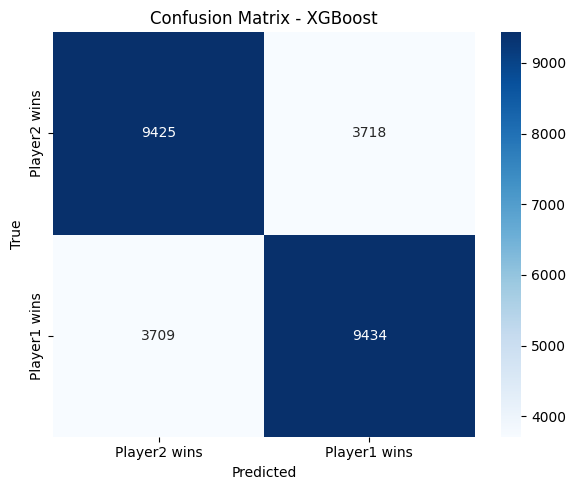

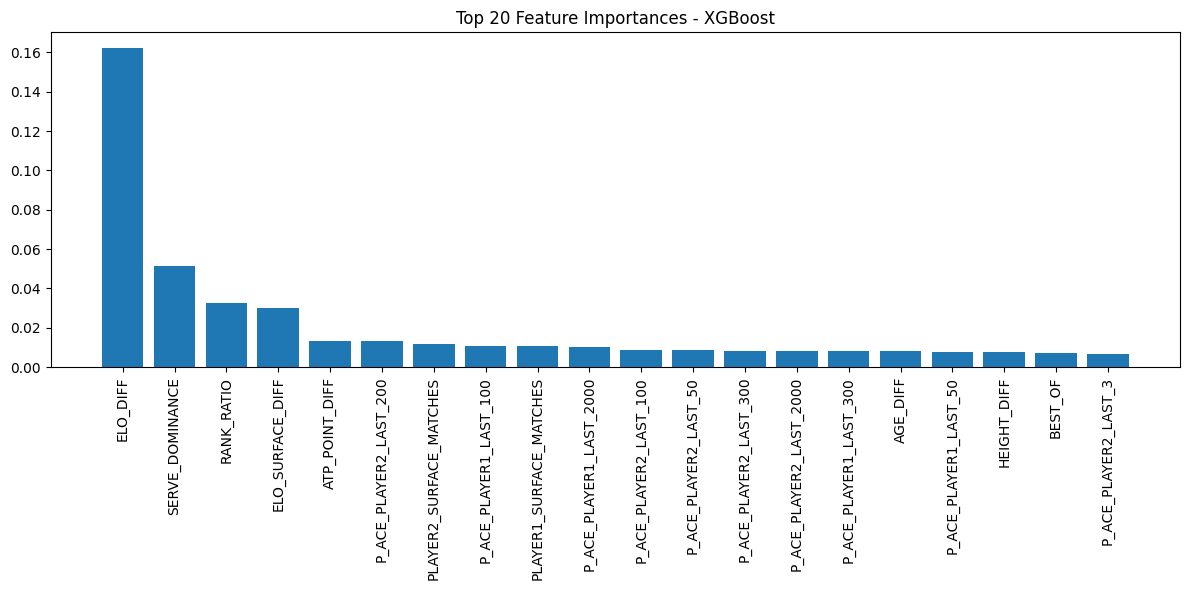

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the final symmetric player1/player2 dataset
df = pd.read_csv("../Datasets/final_tennis_dataset_symmetric.csv")

# 2. Define post-match columns to exclude from training
cols_to_exclude = [
    'TARGET', 'PLAYER1_ID', 'PLAYER2_ID', 'SCORE', 'TOURNEY_DATE', 'MINUTES',
    'PLAYER1_ACE', 'PLAYER2_ACE', 'PLAYER1_DF', 'PLAYER2_DF',
    'PLAYER1_SVPT', 'PLAYER2_SVPT', 'PLAYER1_1STIN', 'PLAYER2_1STIN',
    'PLAYER1_1STWON', 'PLAYER2_1STWON', 'PLAYER1_2NDWON', 'PLAYER2_2NDWON',
    'PLAYER1_SVGMS', 'PLAYER2_SVGMS', 'PLAYER1_BPSAVED', 'PLAYER2_BPSAVED',
    'PLAYER1_BPFACED', 'PLAYER2_BPFACED',
    'BP_EFFICIENCY_PLAYER1', 'BP_EFFICIENCY_PLAYER2'  # derived from post-match stats
]

# # Also exclude all sliding window stats (they are also post-match averages)
# sliding_prefixes = ["P_ACE", "P_DF", "P_1STIN", "P_1STWON", "P_2NDWON", "P_BPSAVED"]
# players = ["PLAYER1", "PLAYER2"]
# windows = [3, 5, 10, 20, 50, 100, 200, 300, 2000]

# for prefix in sliding_prefixes:
#     for player in players:
#         for window in windows:
#             cols_to_exclude.append(f"{prefix}_{player}_LAST_{window}")

# 3. Prepare features (X) and target (y)
X = df.drop(columns=[col for col in cols_to_exclude if col in df.columns], errors='ignore')
X = X.select_dtypes(include=[np.number])  # Keep only numerical features
y = df['TARGET']

# 4. Train/test split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

# 6. Make predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)

# 7. Evaluation metrics
print("\nTest set evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("Log Loss :", log_loss(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["Player2 wins", "Player1 wins"],
            yticklabels=["Player2 wins", "Player1 wins"])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 9. Plot top 20 feature importances
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 20

plt.figure(figsize=(12, 6))
plt.title(f"Top {top_n} Feature Importances - XGBoost")
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()